In [44]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

from torchvision import datasets
from torchvision import transforms

In [45]:
data_path = f"./"
cifar10 = datasets.CIFAR10(data_path, train = True, download = True)
cifar10_val = datasets.CIFAR10(data_path, train = False, download = True)

Files already downloaded and verified
Files already downloaded and verified


In [46]:
len(cifar10)

50000

In [47]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [48]:
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32>, 1, 'automobile')

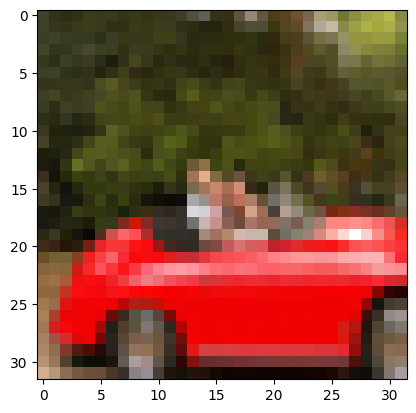

In [49]:
plt.imshow(img)
plt.show()

In [50]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [51]:
tensor_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())

In [52]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [53]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [54]:
# Values in the original PIL image ranged from 0 to 255
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

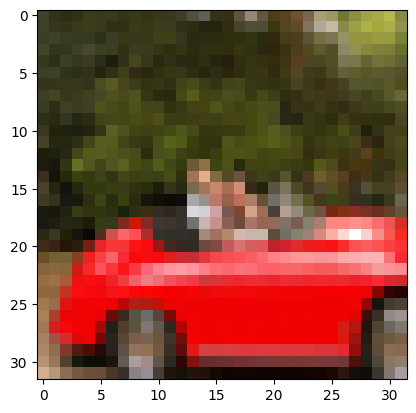

In [55]:
# Change order of axes from C x H x W to H x W x C
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

- Its good practice to normalize the dataset so that each channel has zero mean and unitary standard deviation. By choosing activation functions that are linear around 0 plus or minus 1, keeping the data in the same range means it's more likey that neurons have nonzero gradients and hence, will learn sooner

In [56]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim = 3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [57]:
# Keeps the 3 channels and merges all the remaining dimensions into one. 3 x 32 x 32 image is transformed into a 3 x 1024 vector
imgs.view(3, -1).mean(dim = 1)

tensor([0.4914, 0.4822, 0.4465])

In [58]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [59]:
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [60]:
transformed_cifar10 = datasets.CIFAR10(data_path, 
									   train = True, 
									   download = False, 
									   transform = transforms.Compose([transforms.ToTensor(),
																		transforms.Normalize((0.4915, 0.4823, 0.4468), 
																							(0.2470, 0.2435, 0.2616))]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


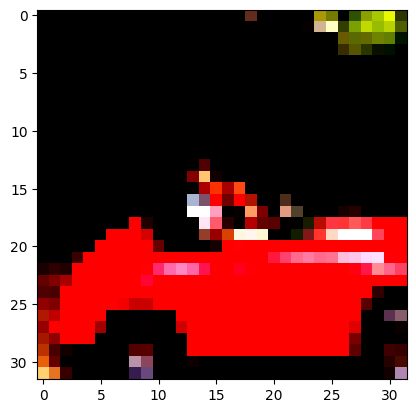

In [61]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [83]:
cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [84]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [85]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']

cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [73]:
n_out = 2

model = nn.Sequential(nn.Linear(3072, 512),
					  nn.Tanh(),
					  nn.Linear(512, n_out))

In [74]:
# Ratio is not preserved
def softmax(x):
	return torch.exp(x) / torch.exp(x).sum()

In [75]:
x = torch.tensor([1.0, 2.0, 3.0])
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [76]:
softmax(x).sum()

tensor(1.)

In [77]:
softmax = nn.Softmax(dim = 1)

x = torch.tensor([[1.0, 2.0, 3.0],
					[1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [94]:
model = nn.Sequential(nn.Linear(3072, 512),
						nn.Tanh(),
						nn.Linear(512, 2),
						nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


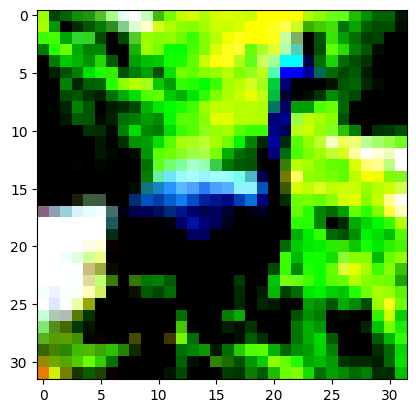

In [96]:
img, _ = cifar2[0]
plt.imshow(img.permute(1, 2,0))

In [97]:
img_batch = img.view(-1).unsqueeze(0)

In [98]:
out = model(img_batch)
out

tensor([[0.5240, 0.4760]], grad_fn=<SoftmaxBackward0>)